# Titanic Survival

Antecedentes
El Titanic fue un transatlántico británico que chocó con un iceberg y se hundió en su viaje inaugural en 1912 desde el Reino Unido hasta Nueva York. Más de 1.500 de los aproximadamente 2.224 pasajeros y tripulantes murieron en el accidente, lo que lo convierte en uno de los mayores desastres marítimos de la historia fuera de la guerra. El barco transportaba a una amplia variedad de pasajeros de todas las edades y géneros, desde viajeros de lujo en primera clase hasta inmigrantes en las clases más bajas. Sin embargo, no todos los pasajeros tenían la misma probabilidad de sobrevivir al accidente. Usamos datos reales sobre una selección de 891 pasajeros para aprender quiénes estaban en el Titanic y qué pasajeros tenían más probabilidades de sobrevivir.

Librerías, opciones y datos
Asegúrese de haber instalado el paquete titanic antes de continuar.

Defina el conjunto de datos titanic a partir de la biblioteca titanic con el siguiente código:

In [2]:
options(digits = 3) # reportamos 3 cifras significativas
library(tidyverse)
library(titanic)

titanic <- titanic_train %>%
    select(Survived, Pclass, Sex, Age, SibSp, Parch, Fare) %>%
    mutate(
        Survived = factor(Survived),
        Pclass = factor(Pclass),
        Sex = factor(Sex)
    )


## Pregunta 1. Tipos de variables.

Inspeccione los datos y también use ?titanic_train para aprender más sobre las variables en el conjunto de datos. Asocie estas variables del conjunto de datos con su tipo de variable. Hay al menos una variable de cada tipo (categórica ordinal, categórica no ordinal, continua, discreta).

In [3]:
str(titanic)


'data.frame':	891 obs. of  7 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...


## Pregunta 2: Demografía de los pasajeros del Titanic

Crea gráficos de densidad de la edad agrupada por sexo. Intenta experimentar con combinaciones de facetas, mezcla alfa, apilamiento y usando conteos de variables en el eje y para responder las siguientes preguntas. Algunas preguntas pueden ser más fáciles de responder con diferentes versiones del gráfico de densidad.

Warning message:
"Removed 177 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 177 rows containing non-finite values (`stat_bin()`)."


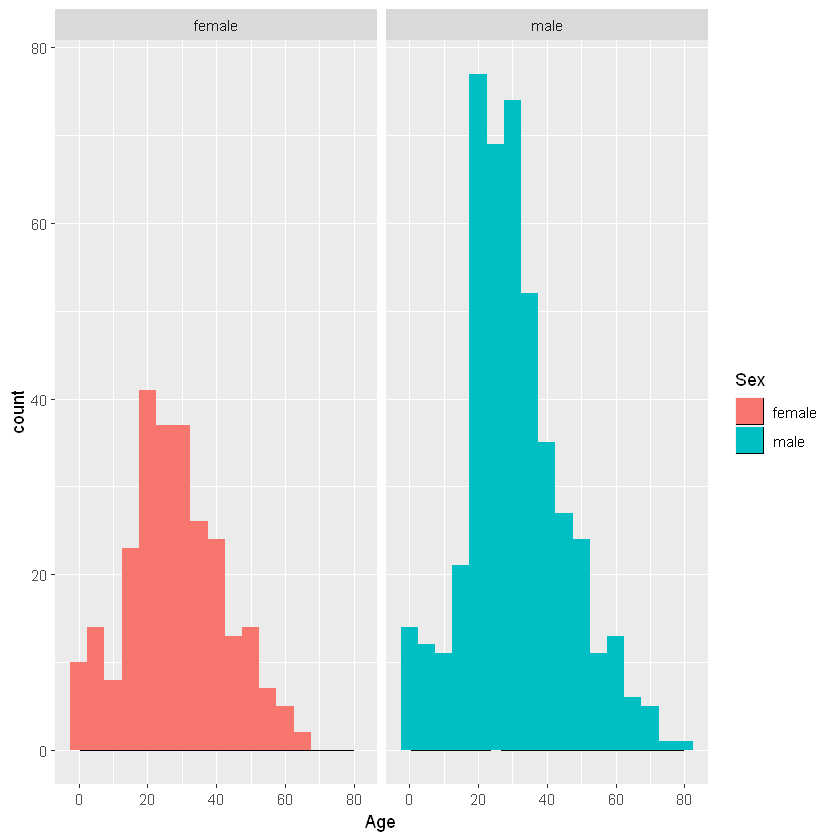

In [5]:
library(ggplot2)

titanic %>%
  ggplot(aes(Age, fill = Sex)) +
  geom_density(alpha = 0.2) +
  facet_grid(. ~ Sex, scales = "free_y", space = "free_y") +
  geom_histogram(aes(y = after_stat(count)), binwidth = 5, position = "dodge")


## Pregunta 3: QQ-plot de la distribución de edad

Use `geom_qq()` para hacer un QQ-plot de la edad de los pasajeros y añada una línea de identidad con `geom_abline()`. Filtrar cualquier individuo con una edad de NA primero. Utilice el siguiente objeto como argumento dparams en `geom_qq()`:

```r
params <- titanic %>%
    filter(!is.na(Age)) %>%
    summarize(mean = mean(Age), sd = sd(Age))
```

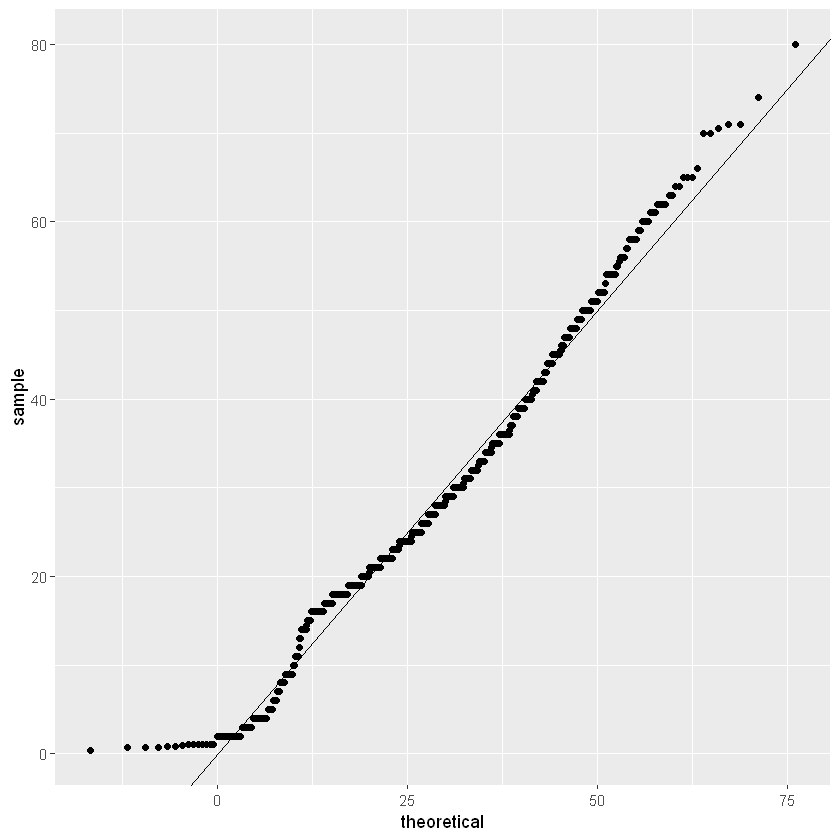

In [6]:
params <- titanic %>%
    filter(!is.na(Age)) %>%
    summarize(mean = mean(Age), sd = sd(Age))

titanic |>
    filter(!is.na(Age)) |>
    ggplot(aes(sample = Age)) +
    geom_qq(dparams = params) +
    geom_abline(intercept = 0, slope = 1)


## Pregunta 4: Supervivencia por sexo
Para responder a las siguientes preguntas, haga diagramas de barras de las variables `Survived` y `Sex` usando `geom_bar()`. Intente gráficar una variable y completar con la otra variable. Es posible que desee probar el gráfico predeterminado, luego intente agregar `position = position_dodge()` a `geom_bar()` para crear barras separadas para cada grupo.

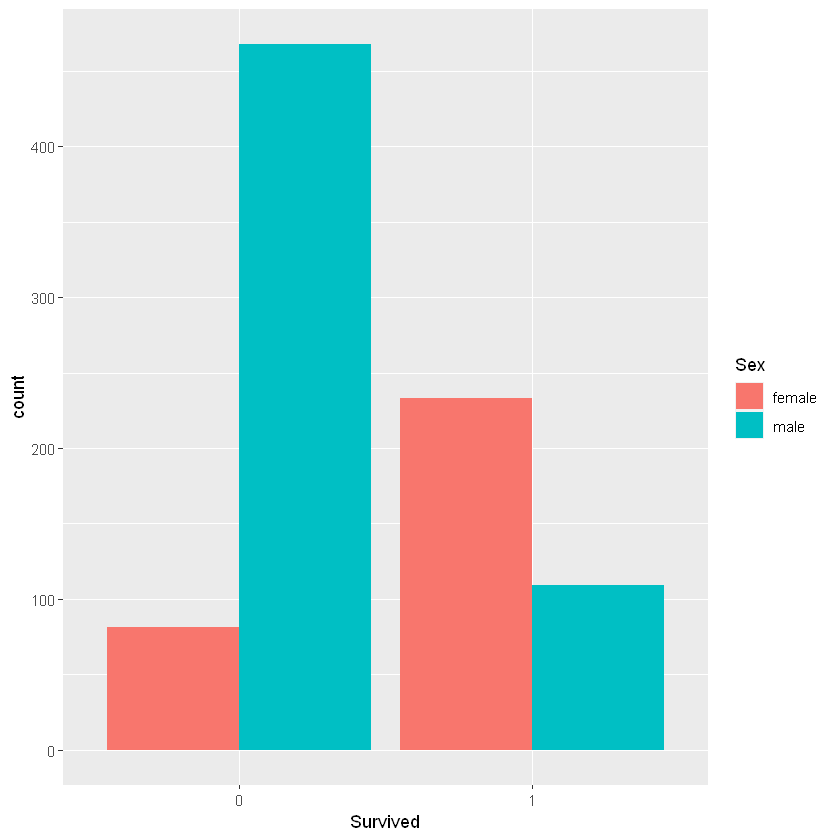

In [7]:
titanic |>
    ggplot(aes(Survived, fill = Sex)) +
    geom_bar(position = position_dodge())


## Pregunta 5: Supervivencia por edad
Haz un gráfico de densidad de la edad rellenado por el estado de supervivencia. Cambia el eje y a `count` y establece `alpha = 0.2`.

¿Qué grupo de edad es el único grupo más propenso a sobrevivir que a morir?

Warning message:
"Removed 177 rows containing non-finite values (`stat_density()`)."


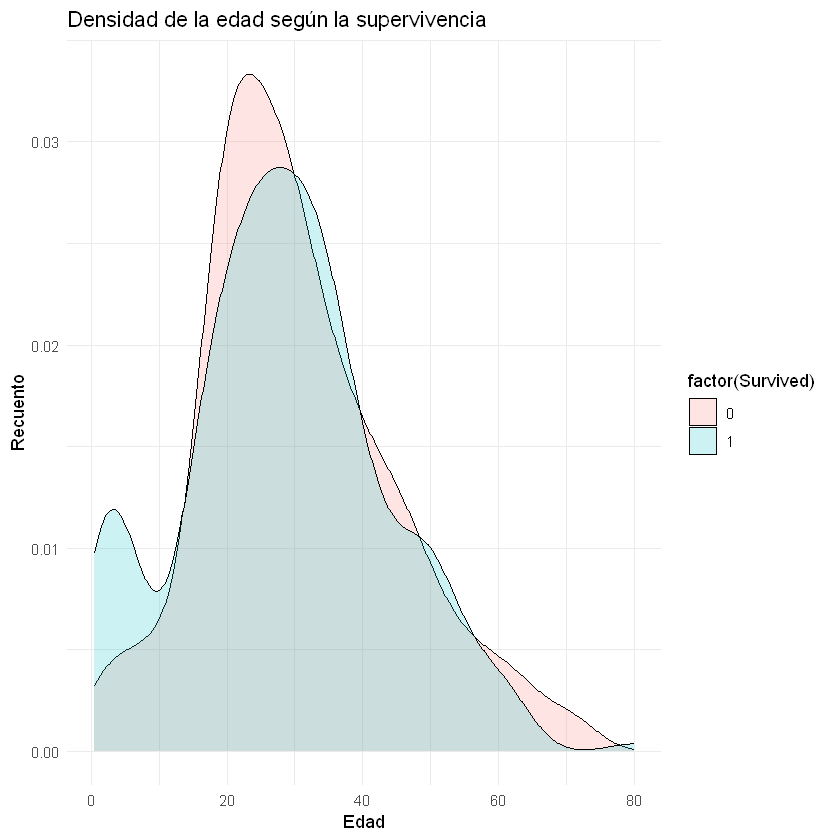

In [8]:
# Crear un gráfico de densidad de la edad rellenado por el estado de supervivencia
titanic |>
    ggplot(aes(x = Age, fill = factor(Survived))) +
    geom_density(alpha = 0.2) +
    scale_y_continuous(labels = scales::comma) +
    labs(title = "Densidad de la edad según la supervivencia", x = "Edad", y = "Recuento") +
    theme_minimal()


## Pregunta 6: Supervivencia por tarifa
Filtra los datos para eliminar a las personas que pagaron una tarifa de 0. Haz un diagrama de caja de las tarifas agrupadas por el estado de supervivencia. Prueba una transformación logarítmica base 2 de las tarifas. Agrega los puntos de datos con `jitter` y `alpha blending`.


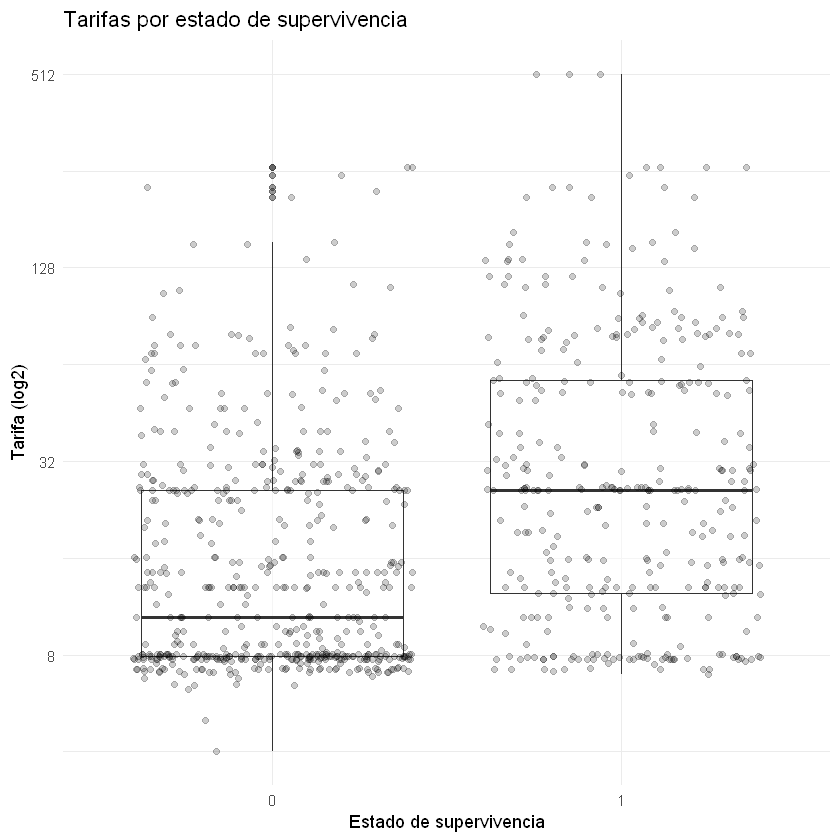

In [9]:
titanic %>%
    filter(Fare > 0) %>%
    # Crear un diagrama de caja de las tarifas agrupadas por el estado de supervivencia
    ggplot(aes(x = factor(Survived), y = Fare)) +
    geom_boxplot(alpha = 0.5) +
    scale_y_continuous(trans = "log2") +
    geom_jitter(alpha = 0.2) +
    labs(title = "Tarifas por estado de supervivencia", x = "Estado de supervivencia", y = "Tarifa (log2)") +
    theme_minimal()


## Pregunta 7: Supervivencia por clase de pasajero
La variable `Pclass` corresponde a la clase de pasajero. Haz tres diagramas de barras.
- Para el primero, haz un diagrama de barras básico de la clase de pasajero rellenado por la supervivencia.
- Para el segundo, haz el mismo diagrama de barras pero utiliza el argumento `position = position_fill()` para mostrar las proporciones relativas en cada grupo en lugar de los recuentos.
- Para el tercero, haz un diagrama de barras de la supervivencia rellenado por la clase de pasajero utilizando `position = position_fill()`.

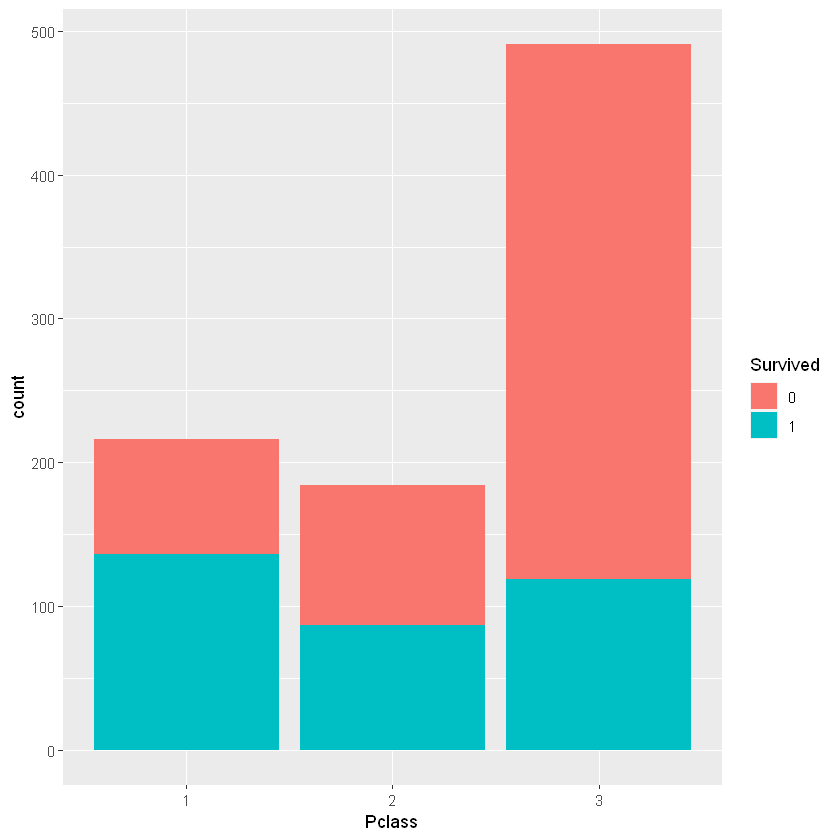

In [10]:
titanic |>
    ggplot(aes(Pclass, fill = Survived)) +
    geom_bar()

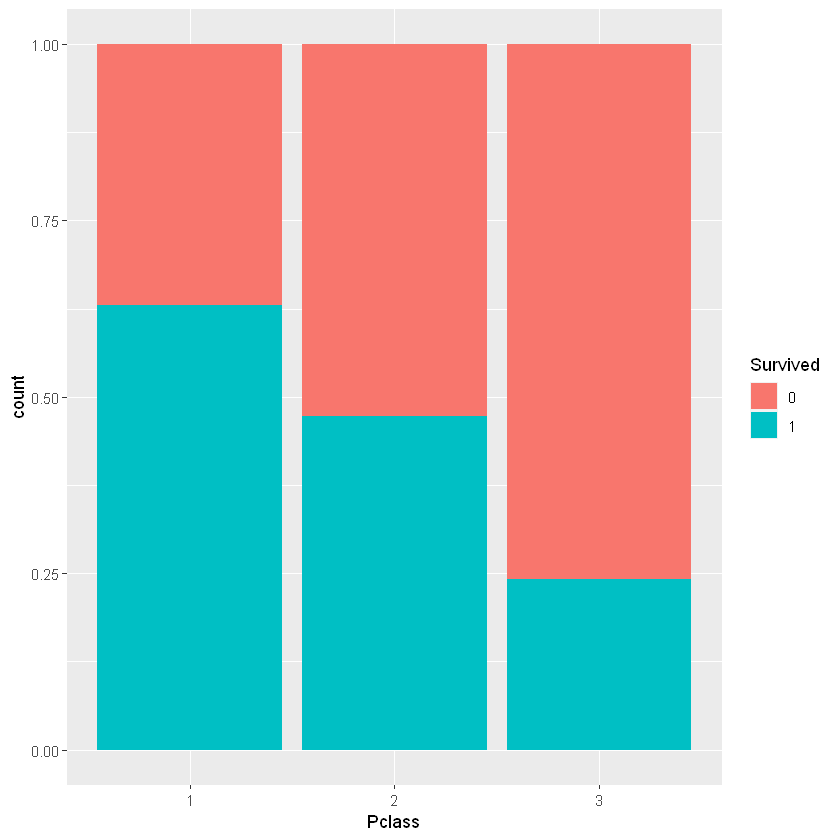

In [11]:
titanic |>
    ggplot(aes(Pclass, fill = Survived)) +
    geom_bar(position = position_fill())

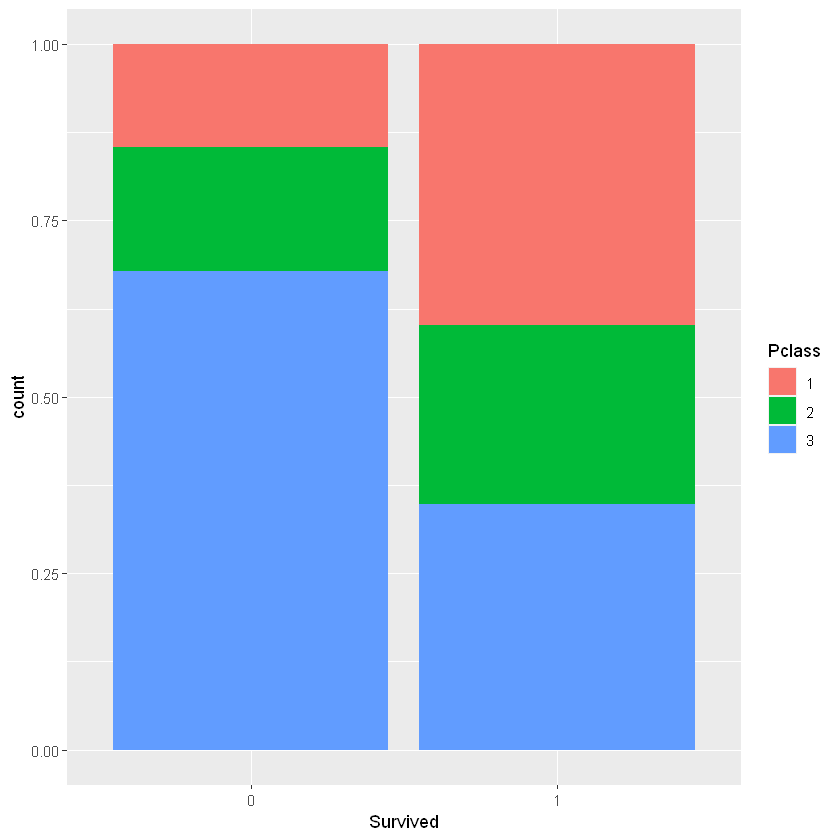

In [12]:
titanic |>
    ggplot(aes(Survived, fill = Pclass)) +
    geom_bar(position = position_fill())

## Pregunta 8: Supervivencia por edad, sexo y clase de pasajero
Crea una cuadrícula de diagramas de densidad para la edad, relleno por el estado de supervivencia, con el recuento en el eje y, facetado por sexo y clase de pasajero.

Warning message:
"Removed 177 rows containing non-finite values (`stat_density()`)."


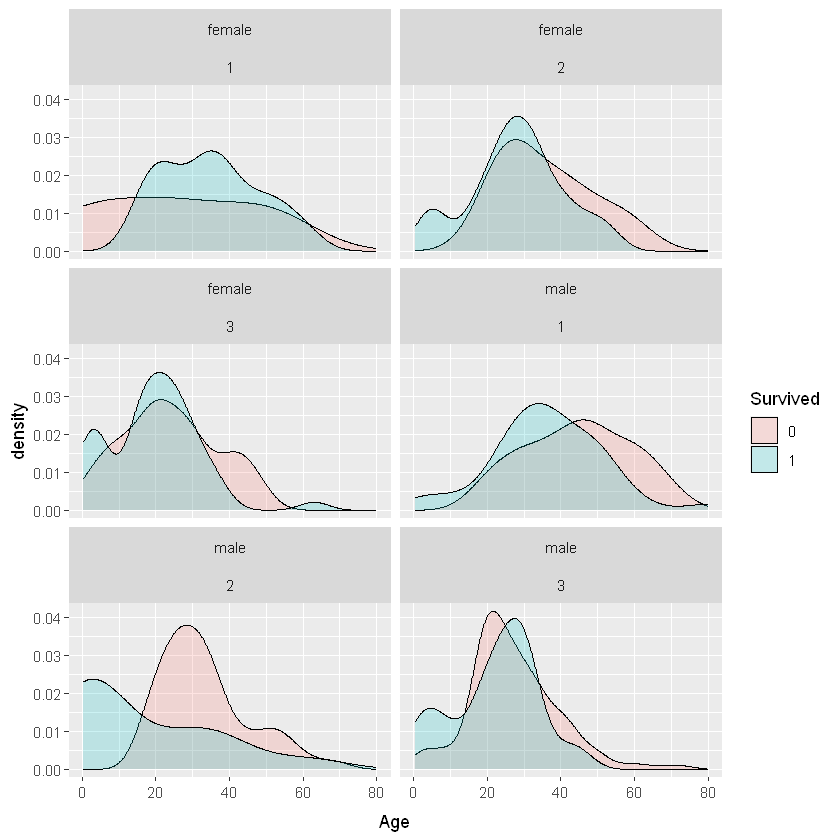

In [13]:
titanic |>
ggplot(aes(x = Age, fill = Survived)) +
  geom_density(alpha = 0.2) +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~ Sex + Pclass, nrow = 3)
